In [1]:
import os
import torch
from utils import *
from infer import Inferer
from cnnmodel.model import CNNModel

In [2]:
# Path to load model
PATH = os.path.join(os.getcwd(), "cls/vox_16_all_trans_rot_x2.pth")
# Load
model = torch.load(PATH)
model.eval()

CNNModel(
  (conv_layer1): Sequential(
    (0): Conv3d(1, 16, kernel_size=(3, 3, 3), stride=(1, 1, 1))
    (1): LeakyReLU(negative_slope=0.01)
    (2): MaxPool3d(kernel_size=(2, 2, 2), stride=(2, 2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (conv_layer2): Sequential(
    (0): Conv3d(16, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1))
    (1): LeakyReLU(negative_slope=0.01)
    (2): MaxPool3d(kernel_size=(2, 2, 2), stride=(2, 2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=512, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=9, bias=True)
  (relu): LeakyReLU(negative_slope=0.01)
  (batch): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop): Dropout(p=0.15, inplace=False)
)

Loading data for unk...


100%|██████████| 1000/1000 [00:52<00:00, 19.20it/s]


Ground Truth: lam; Prediction Accuracy: 0.3610000014305115


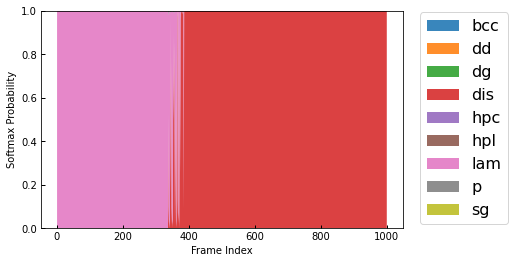

Loading data for dg_glyco...


100%|██████████| 101/101 [00:10<00:00,  9.61it/s]


Ground Truth: dg; Prediction Accuracy: 1.0


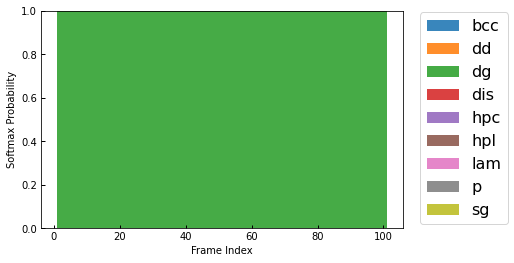

Loading data for dd_glyco...


100%|██████████| 51/51 [00:08<00:00,  6.28it/s]


Ground Truth: dd; Prediction Accuracy: 1.0


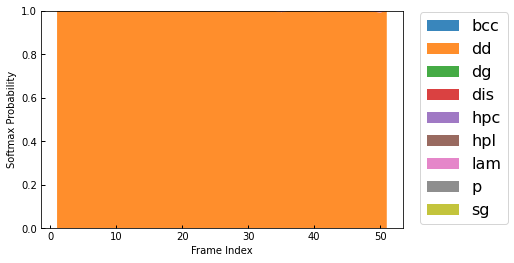

Loading data for dg_0.3...


100%|██████████| 125/125 [00:01<00:00, 65.03it/s]


Ground Truth: dg; Prediction Accuracy: 1.0


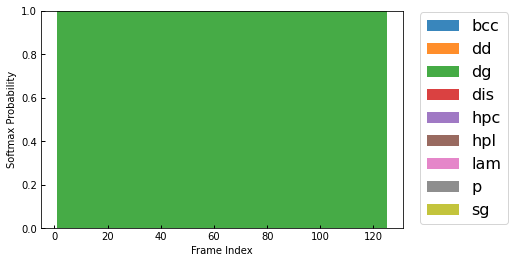

Loading data for lam_large...


100%|██████████| 100/100 [00:05<00:00, 19.61it/s]


Ground Truth: lam; Prediction Accuracy: 1.0


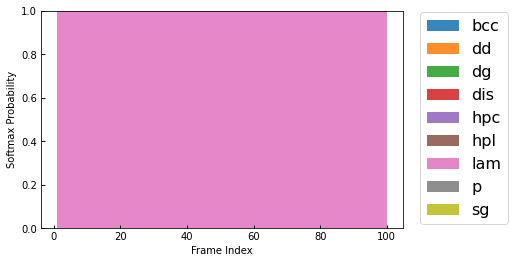

Loading data for lam_dup...


100%|██████████| 170/170 [00:12<00:00, 14.13it/s]


Ground Truth: lam; Prediction Accuracy: 0.9941176176071167


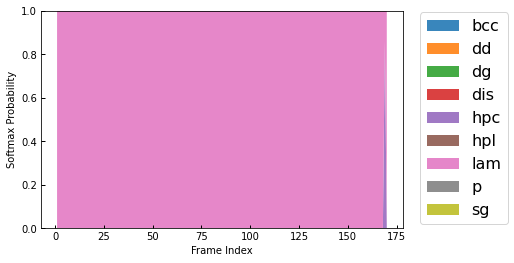

Loading data for hpc_large...


100%|██████████| 50/50 [00:01<00:00, 27.01it/s]


Ground Truth: hpc; Prediction Accuracy: 1.0


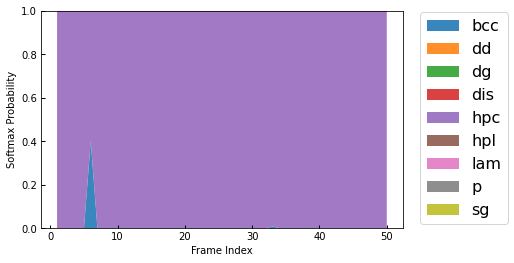

Loading data for hpc_dup...


100%|██████████| 50/50 [00:27<00:00,  1.83it/s]

Ground Truth: hpc; Prediction Accuracy: 1.0


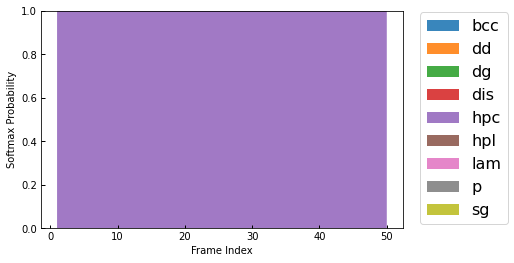

In [3]:
infer_data = {'unk': ('./point_clouds/unk', 'lam'),
              'dg_glyco': ('./point_clouds/dg_glyco', 'dg'),
              'dd_glyco': ('./point_clouds/dd_glyco', 'dd'),
              'dg_0.3': ('./point_clouds/dg_0.3', 'dg'),
              'lam_large': ('./point_clouds/lam_large', 'lam'),
              'lam_dup': ('./point_clouds/lam_dup', 'lam'),
              'hpc_large': ('./point_clouds/hpc_large', 'hpc'),
              'hpc_dup': ('./point_clouds/hpc_dup', 'hpc')
             }

inferer = Inferer()
for piece, (data_path, truth) in infer_data.items():
    print(f'Loading data for {piece}...')
    scores, conf_mat = inferer.infer(model, data_path, truth)  
    inferer.plot_softmax_scores(scores)